#### 机器学习-支持向量机（SVM）

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
# 设置中文显示
plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False  # 正确显示负号

In [2]:
# 修正数据定义方式
# 分开定义特征和标签
X = np.array([
    [2.0, 8.0],  # 橙子：低甜高酸
    [2.5, 7.5],
    [3.0, 7.0],
    [7.0, 3.0],  # 苹果：高甜低酸
    [7.5, 2.5],
    [8.0, 2.0],
    [3.5, 6.5],  # 边界案例
    [6.5, 3.5]
])

y = np.array([0, 0, 0, 1, 1, 1, 0, 1])  # 0=橙子, 1=苹果

print("特征数据形状:", X.shape)
print("标签数据形状:", y.shape)
print("特征数据:\n", X)
print("标签数据:", y)

特征数据形状: (8, 2)
标签数据形状: (8,)
特征数据:
 [[2.  8. ]
 [2.5 7.5]
 [3.  7. ]
 [7.  3. ]
 [7.5 2.5]
 [8.  2. ]
 [3.5 6.5]
 [6.5 3.5]]
标签数据: [0 0 0 1 1 1 0 1]


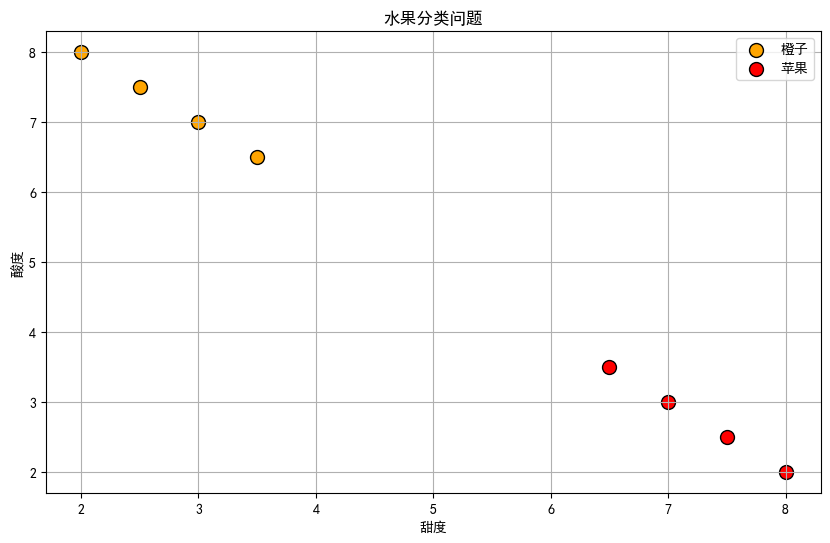

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], c='orange', s=100, label='橙子', edgecolors='k')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', s=100, label='苹果', edgecolors='k')
plt.xlabel('甜度')
plt.ylabel('酸度')
plt.title('水果分类问题')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
def calculate_distance(point, w, b):
    """计算点到超平面的距离"""
    return abs(np.dot(w, point) + b) / np.linalg.norm(w)

# 定义几条可能的分隔线参数
lines = [
    {'w': np.array([1, -1]), 'b': 5, 'label': '线1'},
    {'w': np.array([1, -1]), 'b': 4.5, 'label': '线2'},
    {'w': np.array([1, -1]), 'b': 5.5, 'label': '线3'}
]

# 计算各条线的间隔
for line in lines:
    distances = [calculate_distance(point, line['w'], line['b']) for point in X]
    min_distance = min(distances)
    print(f"{line['label']}的间隔: {min_distance:.3f}")

线1的间隔: 0.000
线2的间隔: 0.354
线3的间隔: 0.354


e:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


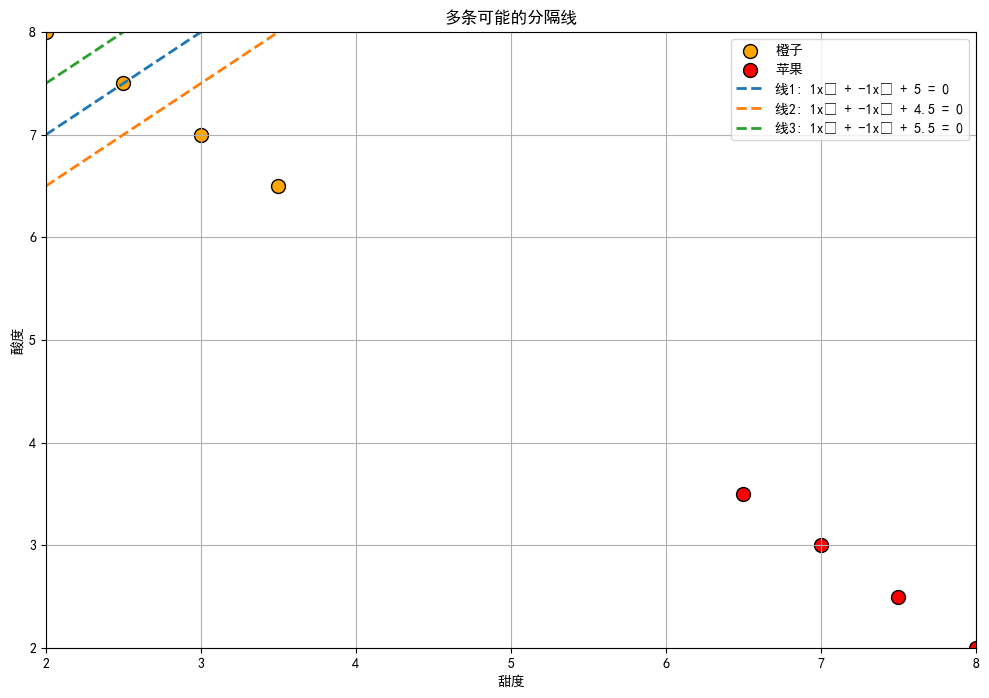

In [5]:
plt.figure(figsize=(12, 8))

# 画数据点
plt.scatter(X[y==0, 0], X[y==0, 1], c='orange', s=100, label='橙子', edgecolors='k')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', s=100, label='苹果', edgecolors='k')

# 画分隔线
x_line = np.linspace(2, 8, 100)

for i, line in enumerate(lines):
    w1, w2 = line['w']
    b = line['b']
    y_line = (-w1 * x_line - b) / w2
    plt.plot(x_line, y_line, linestyle='--', linewidth=2, 
             label=f"{line['label']}: {w1}x₁ + {w2}x₂ + {b} = 0")

plt.xlabel('甜度')
plt.ylabel('酸度')
plt.title('多条可能的分隔线')
plt.legend()
plt.grid(True)
plt.axis([2, 8, 2, 8])
plt.show()

In [6]:
# 选择间隔最大的线（线1）
best_line = lines[0]
w_opt, b_opt = best_line['w'], best_line['b']

# 计算所有点到最优线的距离
distances = [calculate_distance(point, w_opt, b_opt) for point in X]

# 找到支持向量（距离最近的点）
support_vector_indices = np.argsort(distances)[:2]  # 取最近的两个点
support_vectors = X[support_vector_indices]

print("支持向量:")
for i, idx in enumerate(support_vector_indices):
    print(f"支持向量 {i+1}: 坐标{X[idx]}, 距离{distances[idx]:.3f}, 标签{'橙子' if y[idx]==0 else '苹果'}")

支持向量:
支持向量 1: 坐标[2.5 7.5], 距离0.000, 标签橙子
支持向量 2: 坐标[2. 8.], 距离0.707, 标签橙子


In [7]:
# 使用scikit-learn的SVM
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

print("scikit-learn训练结果:")
print(f"支持向量数量: {len(clf.support_vectors_)}")
print(f"支持向量坐标:\n{clf.support_vectors_}")
print(f"模型参数: w = {clf.coef_[0]}, b = {clf.intercept_[0]}")

scikit-learn训练结果:
支持向量数量: 2
支持向量坐标:
[[3.5 6.5]
 [6.5 3.5]]
模型参数: w = [ 0.33333333 -0.33333333], b = -0.0


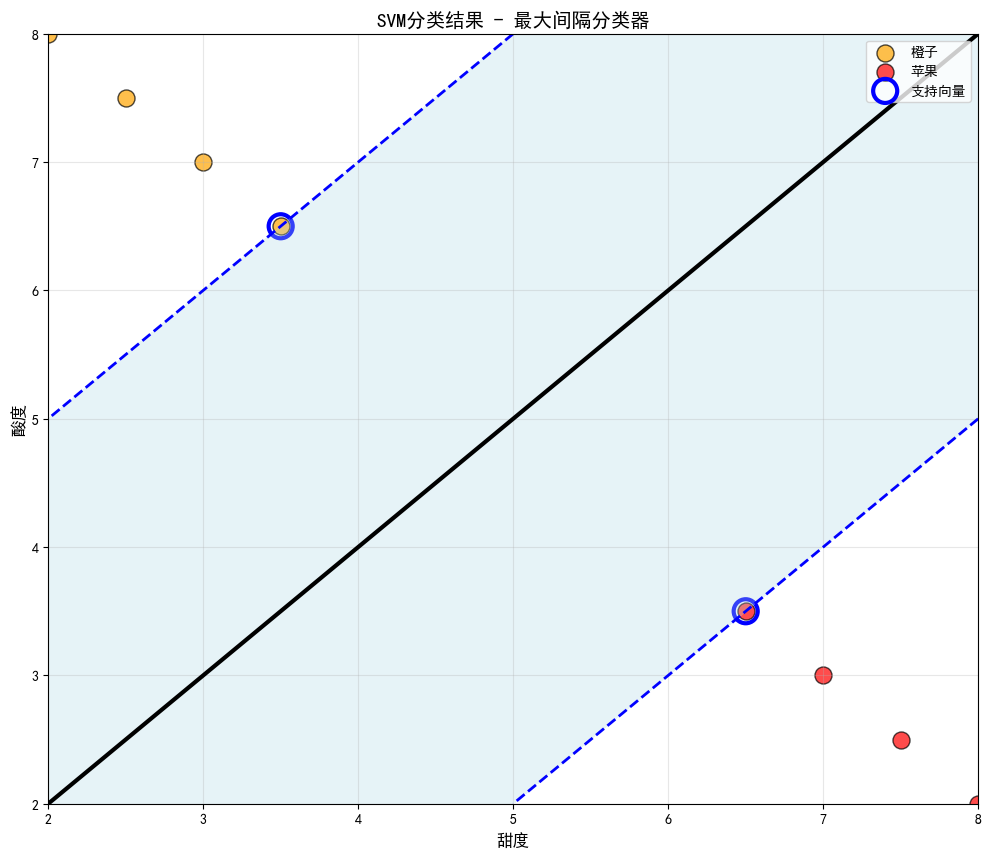

In [8]:
plt.figure(figsize=(12, 10))

# 1. 画数据点
plt.scatter(X[y==0, 0], X[y==0, 1], c='orange', s=150, label='橙子', edgecolors='k', alpha=0.7)
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', s=150, label='苹果', edgecolors='k', alpha=0.7)

# 2. 获取决策函数值用于绘制等高线
xx, yy = np.meshgrid(np.linspace(2, 8, 100), np.linspace(2, 8, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 3. 画决策边界和间隔
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], 
           colors=['blue', 'black', 'blue'], linewidths=[2, 3, 2])

# 4. 突出显示支持向量
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
           s=300, facecolors='none', edgecolors='blue', 
           linewidth=3, label='支持向量')

# 5. 填充间隔区域
plt.contourf(xx, yy, Z, levels=[-1, 1], colors=['lightblue'], alpha=0.3)

plt.xlabel('甜度', fontsize=12)
plt.ylabel('酸度', fontsize=12)
plt.title('SVM分类结果 - 最大间隔分类器', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis([2, 8, 2, 8])
plt.show()

新水果预测结果:
甜度	酸度	预测		置信度
----------------------------------------
4.0	6.0	橙子	-0.667
6.0	4.0	苹果	+0.667
2.5	7.0	橙子	-1.500
7.5	2.5	苹果	+1.667


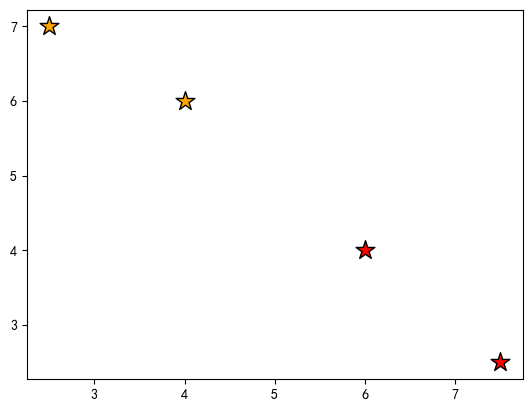

In [9]:
def predict_fruit(sweetness, acidity, clf):
    """预测水果类别"""
    point = np.array([[sweetness, acidity]])
    prediction = clf.predict(point)
    confidence = clf.decision_function(point)
    return "苹果" if prediction[0] == 1 else "橙子", confidence[0]

# 测试新水果
test_fruits = [
    (4.0, 6.0),  # 边界案例
    (6.0, 4.0),  # 边界案例  
    (2.5, 7.0),  # 明显橙子
    (7.5, 2.5)   # 明显苹果
]

print("新水果预测结果:")
print("甜度\t酸度\t预测\t\t置信度")
print("-" * 40)
for sweet, acid in test_fruits:
    prediction, confidence = predict_fruit(sweet, acid, clf)
    print(f"{sweet}\t{acid}\t{prediction}\t{confidence:+.3f}")
    
    # 在图上标记预测点
    color = 'red' if prediction == "苹果" else 'orange'
    plt.scatter(sweet, acid, c=color, s=200, marker='*', edgecolors='black')

In [10]:
# SVM的数学原理简单演示
print("\n=== SVM数学原理 ===")
print("优化目标: 最小化 ½||w||²")
print("约束条件: y_i(w·x_i + b) ≥ 1")

# 对于支持向量，约束条件是等号成立
for i, sv_idx in enumerate(clf.support_):
    sv = X[sv_idx]
    y_val = y[sv_idx]
    margin_value = y_val * (np.dot(clf.coef_[0], sv) + clf.intercept_[0])
    print(f"支持向量 {i+1}: y(w·x + b) = {margin_value:.6f} (应该等于1)")


=== SVM数学原理 ===
优化目标: 最小化 ½||w||²
约束条件: y_i(w·x_i + b) ≥ 1
支持向量 1: y(w·x + b) = -0.000000 (应该等于1)
支持向量 2: y(w·x + b) = 1.000000 (应该等于1)


#### 案例

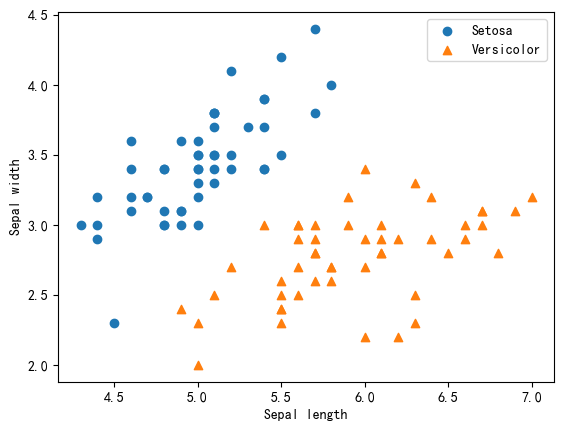

[-4.38538095e-15 -4.48530102e-16]
1.0


e:\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


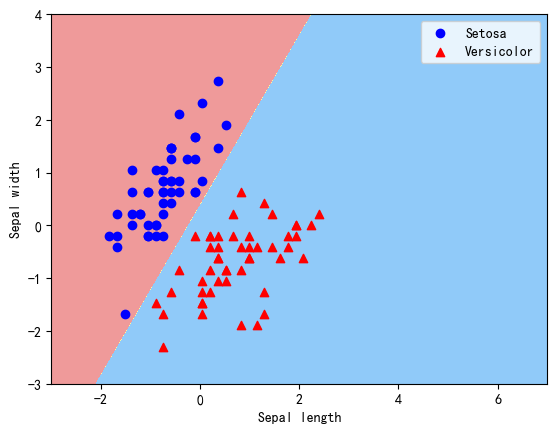

In [11]:
# 线性SCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

plt.scatter(X[y==0,0],X[y==0,1],marker='o')
plt.scatter(X[y==1,0],X[y==1,1],marker='^')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(['Setosa','Versicolor'])
plt.show()




# 标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)
print(X_std.mean(axis=0))

from sklearn.svm import LinearSVC
svc = LinearSVC(C=1e9)
svc.fit(X_std,y)

print(svc.score(X_std,y))

# 画决策边界
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

plot_decision_boundary(svc, axis=[-3, 7, -3, 4])
plt.scatter(X_std[y==0,0],X_std[y==0,1],marker='o',color='blue')
plt.scatter(X_std[y==1,0],X_std[y==1,1],marker='^',color='red')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(['Setosa','Versicolor'])
plt.show()


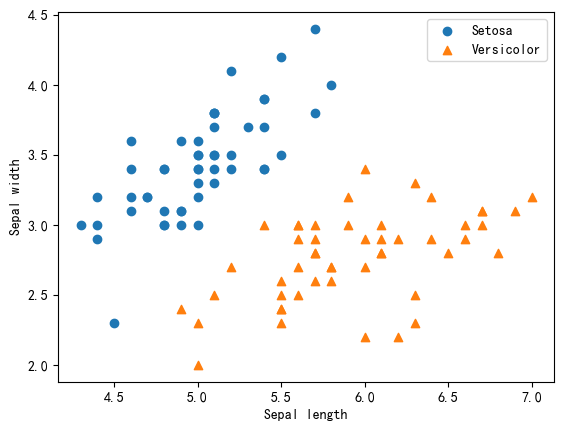

[-4.38538095e-15 -4.48530102e-16]
1.0


e:\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


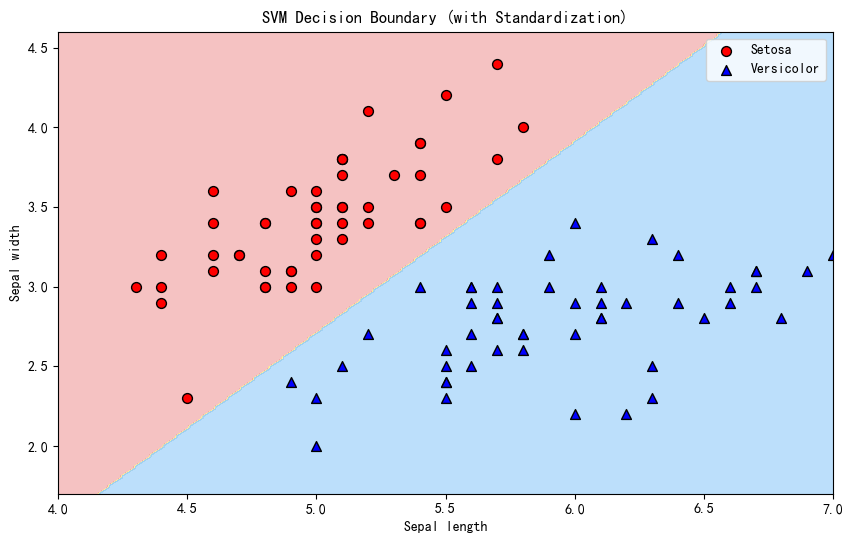

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

plt.scatter(X[y==0,0],X[y==0,1],marker='o')
plt.scatter(X[y==1,0],X[y==1,1],marker='^')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(['Setosa','Versicolor'])
plt.show()

# 标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)
print(X_std.mean(axis=0))

from sklearn.svm import LinearSVC
svc = LinearSVC(C=1e9)
svc.fit(X_std,y)

print(svc.score(X_std,y))

# 画决策边界 - 修正后的函数
def plot_decision_boundary(model, scaler, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    # 关键修正：对新数据也要进行相同的标准化处理
    X_new_std = scaler.transform(X_new)

    y_predict = model.predict(X_new_std)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap, alpha=0.6)
    
    # 添加原始数据点以便对比
    plt.scatter(X[y==0,0], X[y==0,1], marker='o', c='red', edgecolors='k', s=50)
    plt.scatter(X[y==1,0], X[y==1,1], marker='^', c='blue', edgecolors='k', s=50)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.legend(['Setosa','Versicolor'])

# 调用修正后的函数，需要传入标准化器
plt.figure(figsize=(10, 6))
plot_decision_boundary(svc, sc, axis=[4.0, 7.0, 1.7, 4.6])
plt.title('SVM Decision Boundary (with Standardization)')
plt.show()

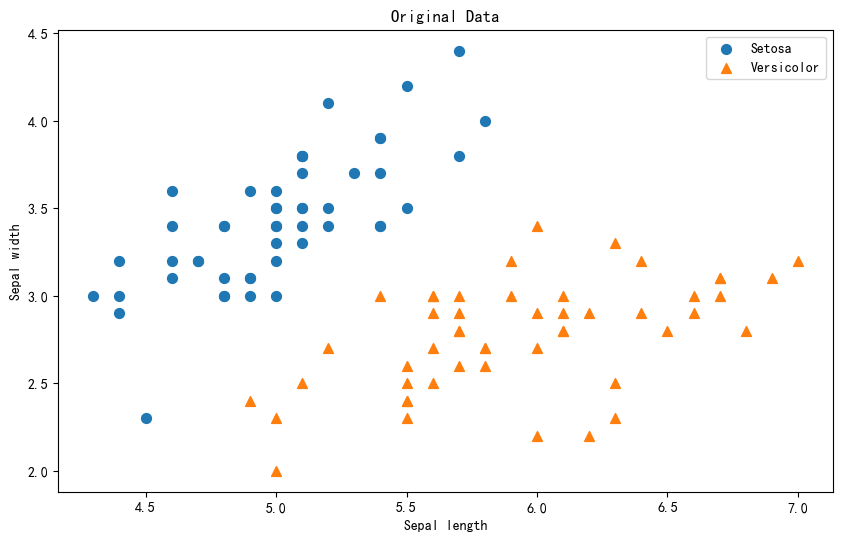

标准化后的均值: [-4.38538095e-15 -4.48530102e-16]
标准化后的标准差: [1. 1.]
训练准确率: 1.0


e:\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


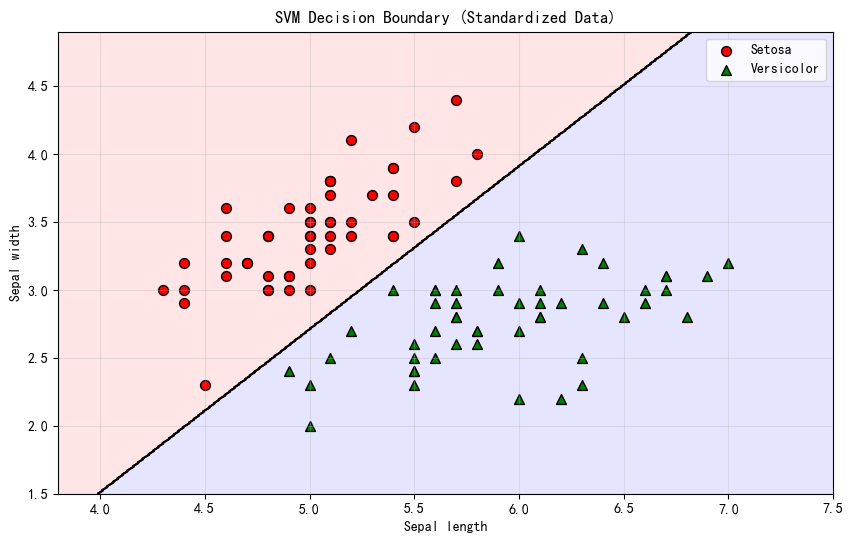

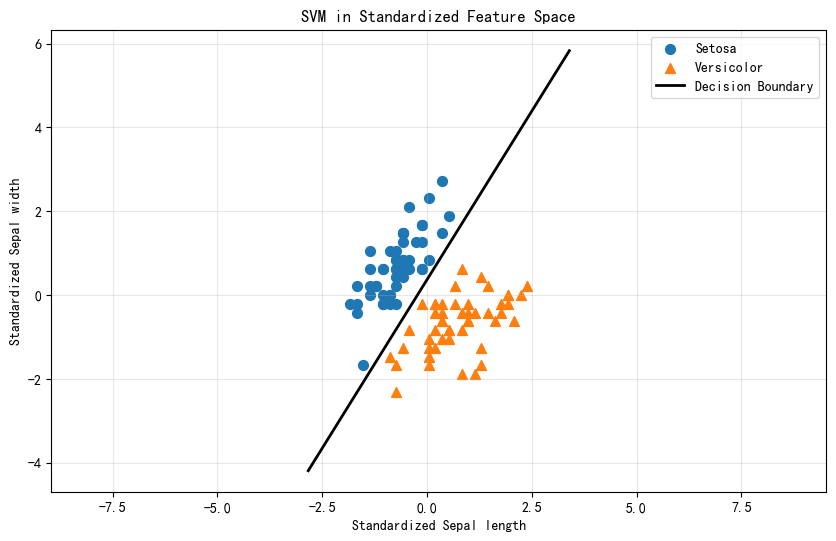

模型系数 (w): [ 4.03236615 -2.50700996]
截距 (b): 0.9273430345999156
支持向量数量: 51


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib.colors import ListedColormap

# 加载数据
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 只取前两类和前两个特征
X = X[y < 2, :2]
y = y[y < 2]

# 可视化原始数据
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o', s=50, label='Setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='^', s=50, label='Versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.title('Original Data')
plt.show()

# 标准化
sc = StandardScaler()
X_std = sc.fit_transform(X)
print("标准化后的均值:", X_std.mean(axis=0))
print("标准化后的标准差:", X_std.std(axis=0))

# 训练SVM
svc = LinearSVC(C=1e9)
svc.fit(X_std, y)
print("训练准确率:", svc.score(X_std, y))

# 修正后的决策边界绘制函数
def plot_decision_boundary(model, scaler, axis, X_data=None, y_data=None):
    """
    绘制决策边界
    
    Parameters:
    model: 训练好的模型
    scaler: 标准化器
    axis: 绘图范围 [x_min, x_max, y_min, y_max]
    X_data: 原始数据（可选，用于显示数据点）
    y_data: 标签（可选）
    """
    # 创建网格点
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], 500),
        np.linspace(axis[2], axis[3], 500)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    # 对新数据进行相同的标准化处理
    X_new_std = scaler.transform(X_new)
    
    # 预测
    y_predict = model.predict(X_new_std)
    zz = y_predict.reshape(x0.shape)
    
    # 创建颜色映射
    custom_cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    
    # 绘制决策区域
    plt.contourf(x0, x1, zz, alpha=0.3, cmap=custom_cmap)
    
    # 绘制决策边界
    plt.contour(x0, x1, zz, colors='k', linewidths=1, alpha=0.8)
    
    # 如果提供了数据，绘制数据点
    if X_data is not None and y_data is not None:
        plt.scatter(X_data[y_data == 0, 0], X_data[y_data == 0, 1], 
                   marker='o', s=50, c='red', edgecolors='k', label='Setosa')
        plt.scatter(X_data[y_data == 1, 0], X_data[y_data == 1, 1], 
                   marker='^', s=50, c='green', edgecolors='k', label='Versicolor')
        plt.legend()

# 绘制决策边界（使用原始数据的坐标范围）
plt.figure(figsize=(10, 6))
plot_decision_boundary(svc, sc, 
                      axis=[X[:, 0].min()-0.5, X[:, 0].max()+0.5, 
                            X[:, 1].min()-0.5, X[:, 1].max()+0.5],
                      X_data=X, y_data=y)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary (Standardized Data)')
plt.grid(True, alpha=0.3)
plt.show()

# 额外：在标准化坐标空间中可视化
plt.figure(figsize=(10, 6))
plt.scatter(X_std[y == 0, 0], X_std[y == 0, 1], marker='o', s=50, label='Setosa')
plt.scatter(X_std[y == 1, 0], X_std[y == 1, 1], marker='^', s=50, label='Versicolor')

# 在标准化空间中绘制决策边界（简单的直线）
w = svc.coef_[0]
b = svc.intercept_[0]
x_plot = np.linspace(X_std[:, 0].min()-1, X_std[:, 0].max()+1, 100)
y_decision = (-w[0] * x_plot - b) / w[1]
plt.plot(x_plot, y_decision, 'k-', linewidth=2, label='Decision Boundary')

plt.xlabel('Standardized Sepal length')
plt.ylabel('Standardized Sepal width')
plt.title('SVM in Standardized Feature Space')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# 打印模型参数
print("模型系数 (w):", svc.coef_[0])
print("截距 (b):", svc.intercept_[0])
print("支持向量数量:", np.sum(svc.decision_function(X_std) <= 1))  # 近似支持向量

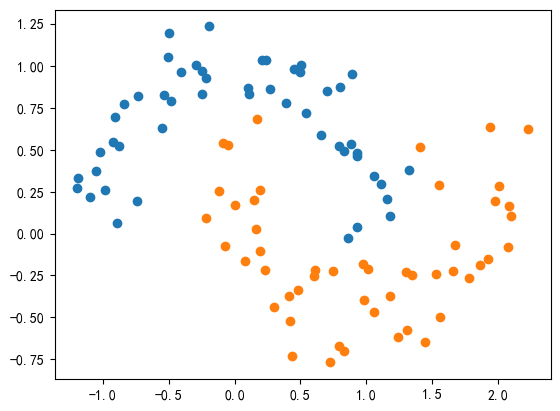

0.84


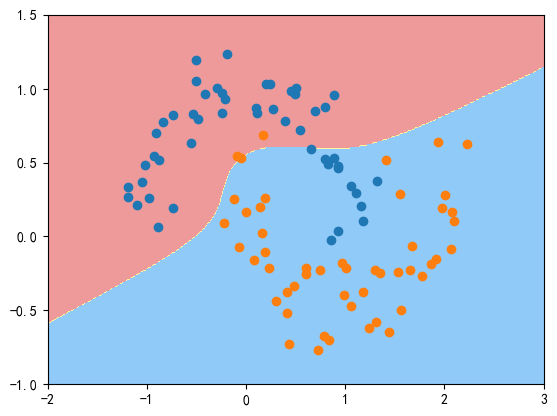

In [14]:
# 多项式SVC
import numpy as np
from sklearn import datasets
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0, 0],X[y==0,1])
plt.scatter(X[y==1, 0],X[y==1,1])
plt.show()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

def polySVC(degree, C=1.0):
    return Pipeline(
        [
            ('std',StandardScaler()),
            ('kernelSVC',SVC(kernel='poly',degree=degree,C=C))
        ]
    )

poly_svc = polySVC(degree=3)
poly_svc.fit(X,y)
print(poly_svc.score(X,y))

# 画决策边界
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

plot_decision_boundary(poly_svc, axis=[-2, 3, -1, 1.5])
plt.scatter(X[y==0, 0],X[y==0,1])
plt.scatter(X[y==1, 0],X[y==1,1])
plt.show()

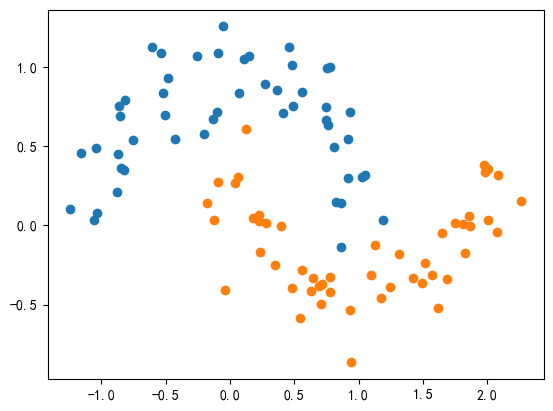

0.98


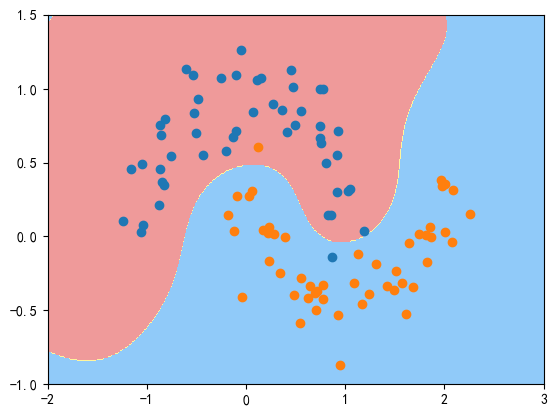

In [25]:
# 核函数，用来升维的
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# 构造数据集
X, y = make_moons(noise=0.15, random_state=66)
# 画数据集
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

# 高斯核函数
def RBFkernel(gamma):
    return Pipeline(
        [
            ("scaler", StandardScaler()),
            ("svc", SVC(kernel="rbf", gamma=gamma))
        ]
    )

svc = RBFkernel(gamma=1)
svc.fit(X, y)
print(svc.score(X, y))

# 画决策边界
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

plot_decision_boundary(svc, axis=[-2, 3, -1, 1.5])
plt.scatter(X[y==0, 0],X[y==0,1])
plt.scatter(X[y==1, 0],X[y==1,1])
plt.show()

e:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


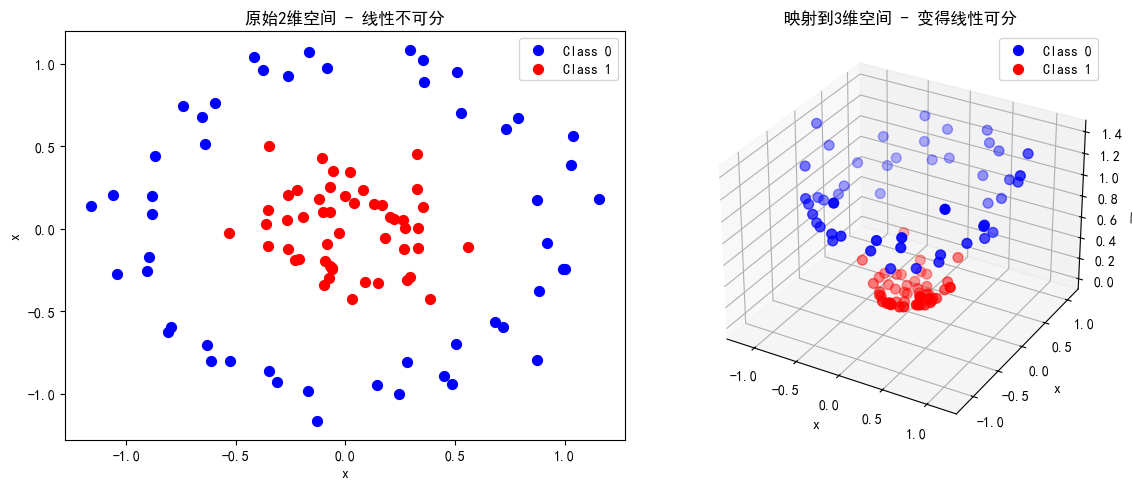

In [16]:
# 升维可视化
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# 创建环形数据（在2维空间中线性不可分）
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=42)

plt.figure(figsize=(12, 5))

# 原始2维空间
plt.subplot(121)
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', s=50, label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', s=50, label='Class 1')
plt.title("原始2维空间 - 线性不可分")
plt.xlabel("x")
plt.ylabel("x")
plt.legend()

# 想象映射到3维空间：添加新特征 z = x₁² + x₂²
plt.subplot(122, projection='3d')
z = X[:, 0]**2 + X[:, 1]**2  # 升维到3维
ax = plt.gca()
ax.scatter(X[y==0, 0], X[y==0, 1], z[y==0], c='blue', s=50, label='Class 0')
ax.scatter(X[y==1, 0], X[y==1, 1], z[y==1], c='red', s=50, label='Class 1')
ax.set_title("映射到3维空间 - 变得线性可分")
ax.set_xlabel("x")
ax.set_ylabel("x")
ax.set_zlabel("x² + x²")
plt.legend()

plt.tight_layout()
plt.show()